<a href="https://colab.research.google.com/github/MScFE-Capstone-Project-WorldQuant-Univ/Quantifying_impact_geopoliticalRisk_tradewar_environmentalShock_on_globalFinancial_commodityMarkets/blob/main/Project_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**DATA IMPORTATION**:

In [ ]:
# Data Extraction

# Load the cleaned Excel dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import skew, kurtosis, jarque_bera

# Read the cleaned dataset
df = pd.read_excel('dataset.xlsx', parse_dates=['date'])

# Parse and index
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)
df.sort_index(inplace=True)

# Summary
print("Loaded dataset shape:", df.shape)
df

Loaded dataset shape: (420, 9)


,sp500,sp500r,lsp500,oil,oilr,gpr,twar,env,epu
date,,,,,,,,,
1990-01-31,329.079987,0.008539,5.796301,22.863182,-0.033362,81.544044,30.920652,57.681392,0.000000
1990-02-28,331.890015,0.024255,5.804804,22.113000,-0.081233,77.407211,30.685625,135.388264,0.000000
1990-03-31,339.940002,-0.026887,5.828769,20.387727,-0.101198,67.591942,36.767010,112.254839,0.000000
1990-04-30,330.799988,0.091989,5.801514,18.425500,-0.012339,81.643845,36.441399,114.704969,0.000000
1990-05-31,361.230011,-0.008886,5.889515,18.199545,-0.086273,86.407120,37.740570,93.407382,0.000000
...,...,...,...,...,...,...,...,...,...
2024-08-31,5648.399902,0.020197,8.639128,76.683182,-0.087821,140.639374,98.140496,302.748764,225.378325
2024-09-30,5762.479980,-0.009897,8.659123,70.236000,0.024597,130.074173,128.640601,155.063845,223.007104
2024-10-31,5705.450195,0.057301,8.649177,71.985000,-0.028677,130.826721,147.926890,248.148984,223.640869


#**PRELIMINARY INVESTIGATIONS:**

**Trend Analysis:**

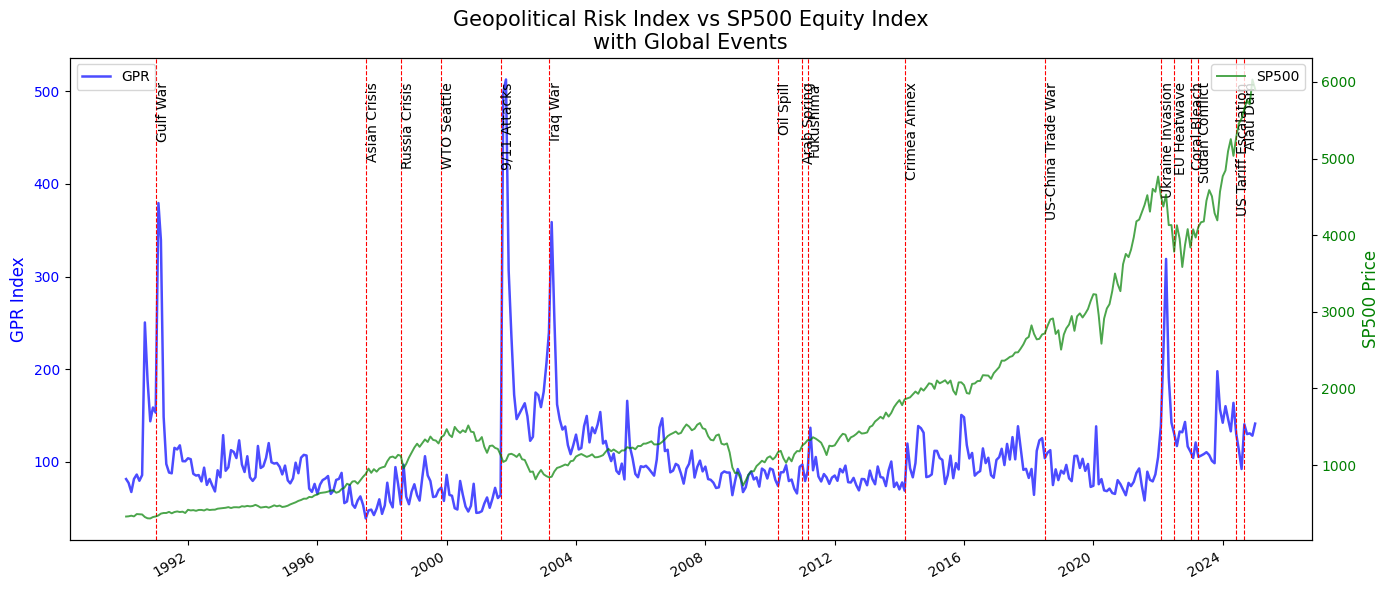

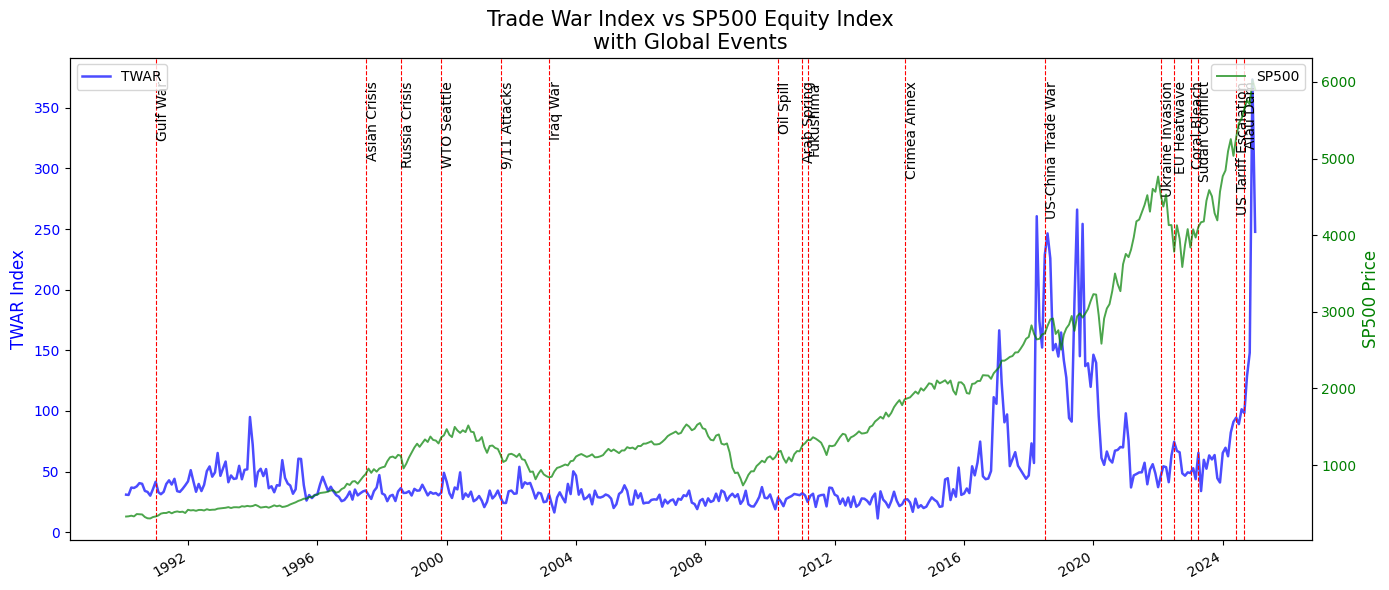

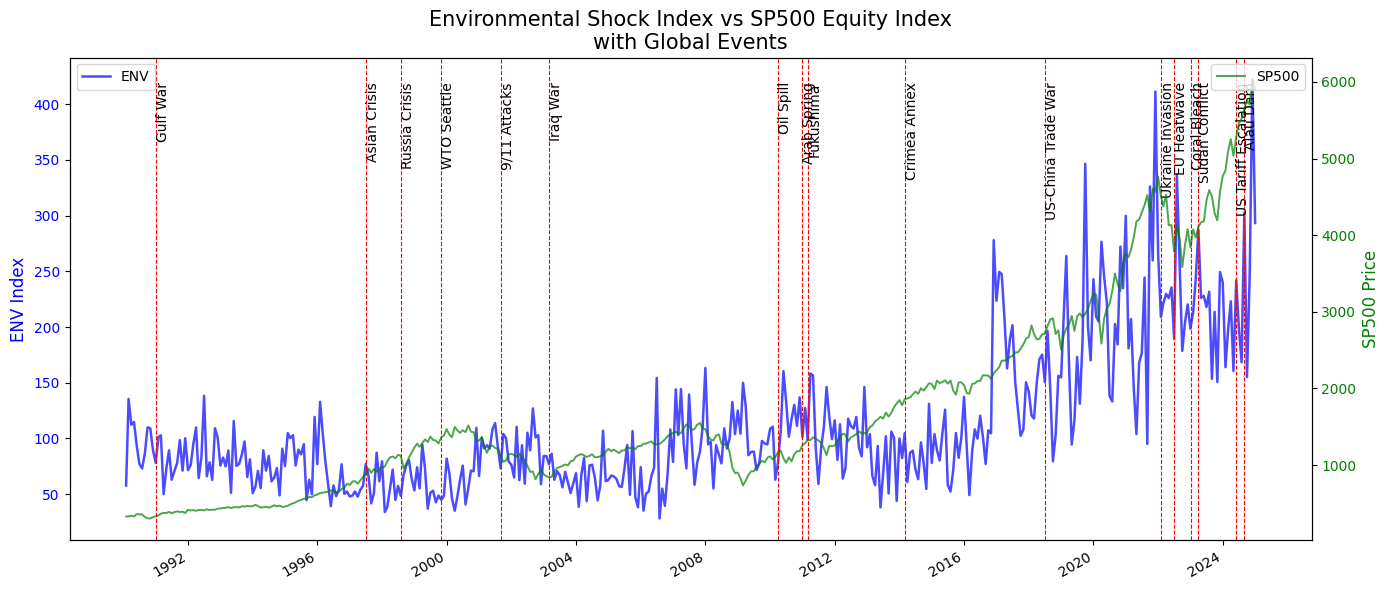

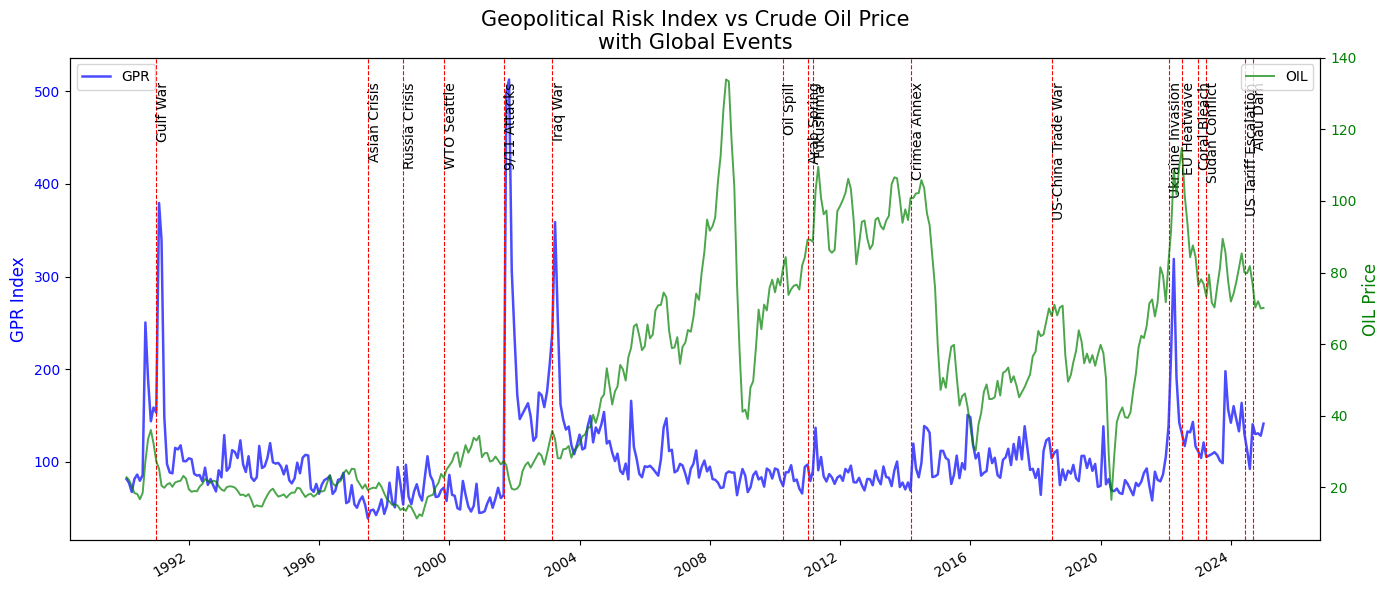

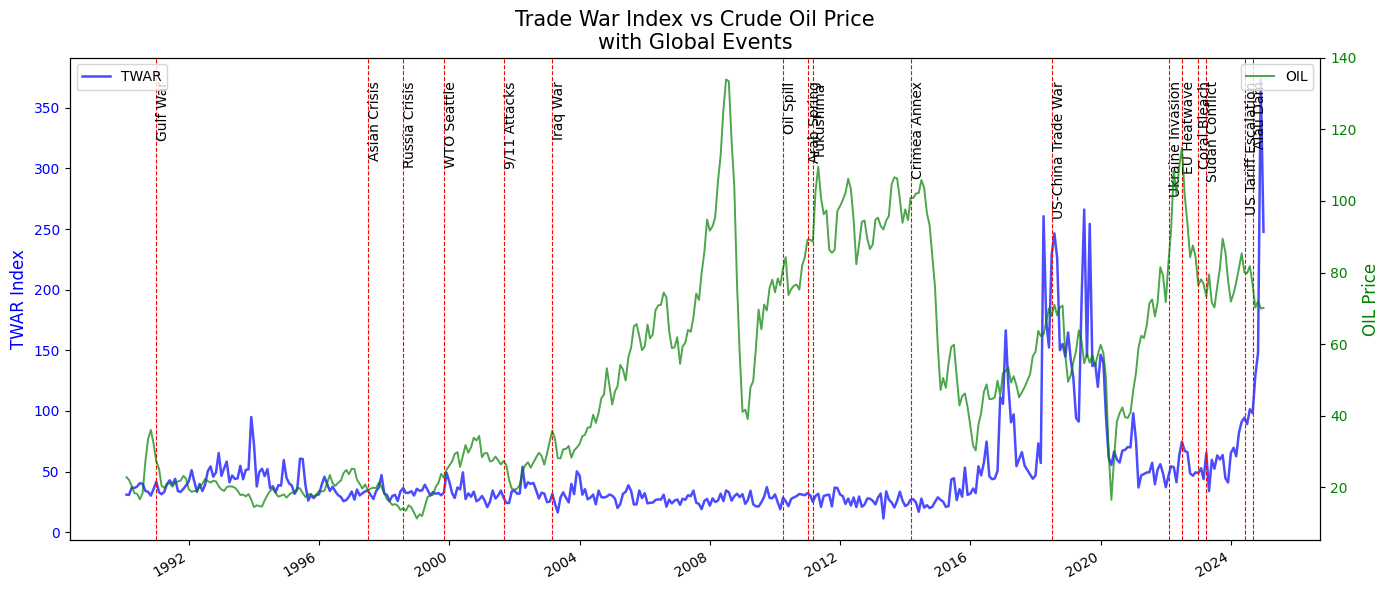

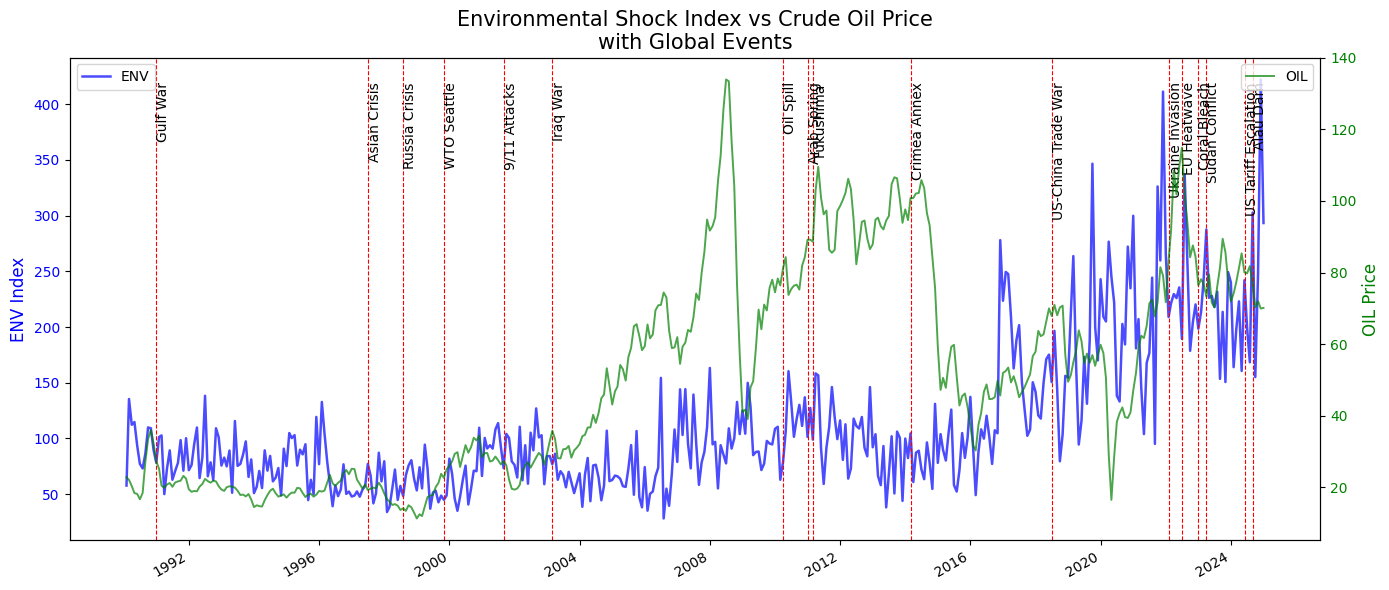

In [ ]:
# Trend Analysis

# Define event timeline by category
events = {
    'Geopolitical': {
        '1991-01': "Gulf War",
        '1997-07': "Asian Crisis",
        '1998-08': "Russia Crisis",
        '2001-09': "9/11 Attacks",
        '2003-03': "Iraq War",
        '2011-01': "Arab Spring",
        '2014-03': "Crimea Annex",
        '2022-02': "Ukraine Invasion",
        '2023-04': "Sudan Conflict"
    },
    'Trade War': {
        '1999-11': "WTO Seattle",
        '2018-07': "US-China Trade War",
        '2024-06': "US Tariff Escalation"
    },
    'Environmental': {
        '2010-04': "Oil Spill",
        '2011-03': "Fukushima",
        '2022-07': "EU Heatwave",
        '2023-01': "Coral Bleach",
        '2024-09': "Alau Dam"
    }
}

# List of plots to generate
plot_pairs = [
    ('gpr', 'sp500', 'Geopolitical Risk Index vs SP500 Equity Index'),
    ('twar', 'sp500', 'Trade War Index vs SP500 Equity Index'),
    ('env', 'sp500', 'Environmental Shock Index vs SP500 Equity Index'),
    ('gpr', 'oil', 'Geopolitical Risk Index vs Crude Oil Price'),
    ('twar', 'oil', 'Trade War Index vs Crude Oil Price'),
    ('env', 'oil', 'Environmental Shock Index vs Crude Oil Price'),
]

# Plot the relational graphs
for x, y, title in plot_pairs:
    fig, ax1 = plt.subplots(figsize=(14, 6))

    # Plot uncertainty index
    ax1.plot(df.index, df[x], color='blue', label=x.upper(), linewidth=1.8, alpha=0.7)
    ax1.set_ylabel(f"{x.upper()} Index", color='blue', fontsize=12)
    ax1.tick_params(axis='y', labelcolor='blue')

    # Twin axis for index
    ax2 = ax1.twinx()
    ax2.plot(df.index, df[y], color='green', label=y.upper(), linewidth=1.4, alpha=0.7)
    ax2.set_ylabel(f"{y.upper()} Price", color='green', fontsize=12)
    ax2.tick_params(axis='y', labelcolor='green')

    # Annotate historical events
    for category, event_dict in events.items():
        for event_date, label in event_dict.items():
            event_date = pd.to_datetime(event_date)
            if df.index.min() <= event_date <= df.index.max():
                ax1.axvline(event_date, color='red', linestyle='--', linewidth=0.8)
                ax1.text(event_date, ax1.get_ylim()[1]*0.95, label, rotation=90,
                         fontsize=10, color='black', verticalalignment='top')

    # Title and formatting
    plt.title(f"{title}\nwith Global Events", fontsize=15)
    fig.autofmt_xdate()
    ax1.legend(loc='upper left')
    ax2.legend(loc='upper right')
    plt.tight_layout()
    plt.show()

**Descriptive Analysis:**

In [ ]:
# Descriptive Analysis

# Target variables
vars_list = ['sp500r', 'oil', 'gpr', 'twar', 'env']
desc = pd.DataFrame(index=vars_list)

# Compute descriptive statistics
desc['Mean'] = df[vars_list].mean()
desc['Median'] = df[vars_list].median()
desc['Min'] = df[vars_list].min()
desc['Max'] = df[vars_list].max()
desc['Std Dev'] = df[vars_list].std()
desc['Skewness'] = df[vars_list].apply(skew)
desc['Kurtosis'] = df[vars_list].apply(kurtosis)

# Display table
desc = desc.round(3)
print("Summary of Descriptive Statistics:\n")
display(desc)

Summary of Descriptive Statistics:



,Mean,Median,Min,Max,Std Dev,Skewness,Kurtosis
sp500r,0.005,0.012,-1.000,0.127,0.065,-8.926,134.178
oil,51.097,47.881,11.347,133.880,29.284,0.474,-0.908
gpr,102.116,90.591,39.046,512.530,50.307,4.077,24.382
twar,47.753,33.797,11.299,373.312,41.494,3.713,17.132
env,110.680,92.249,28.162,422.187,64.243,1.663,3.064


**Correlation Analysis:**

In [ ]:
# Correlation Analysis

import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Select relevant columns
vars_corr = ['sp500r', 'oil', 'gpr', 'twar', 'env']
corr_matrix = df[vars_corr].corr().round(3)

# Print correlation matrix
print("Pearson Correlation Matrix:\n")
corr_matrix

Pearson Correlation Matrix:



,sp500r,oil,gpr,twar,env
sp500r,1.000,-0.070,0.001,-0.172,-0.084
oil,-0.070,1.000,-0.002,0.062,0.342
gpr,0.001,-0.002,1.000,0.025,0.098
twar,-0.172,0.062,0.025,1.000,0.530
env,-0.084,0.342,0.098,0.530,1.000


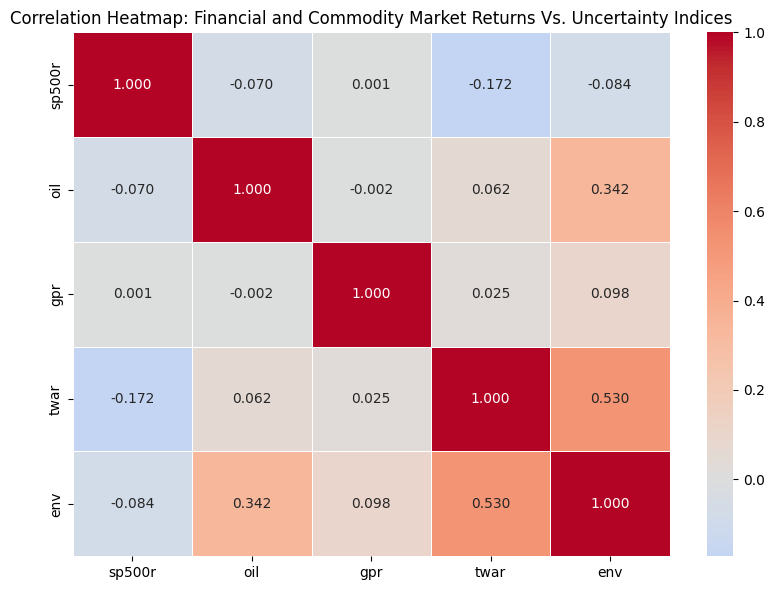

In [ ]:
# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, linewidths=0.5, fmt=".3f")
plt.title("Correlation Heatmap: Financial and Commodity Market Returns Vs. Uncertainty Indices", fontsize=12)
plt.tight_layout()
plt.show()

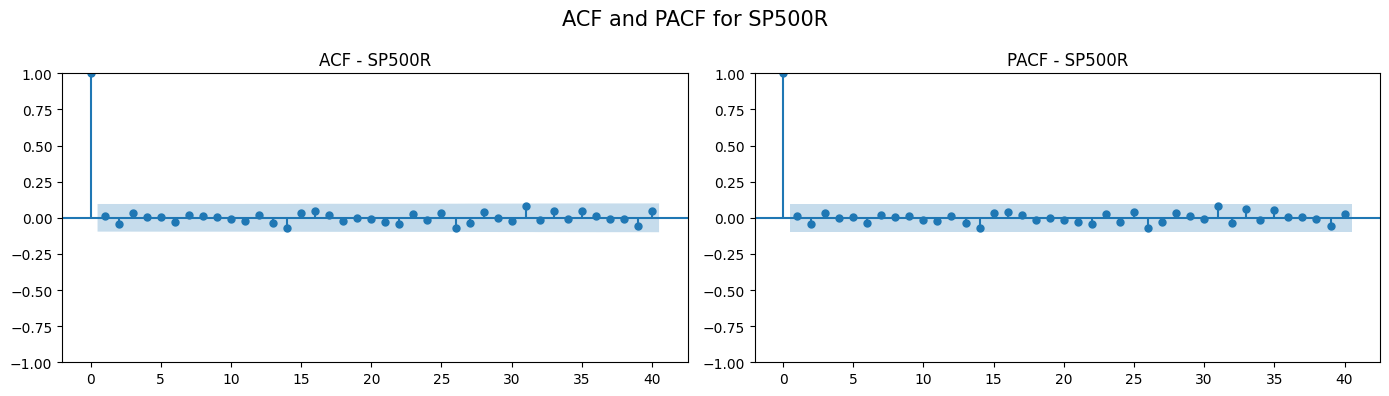

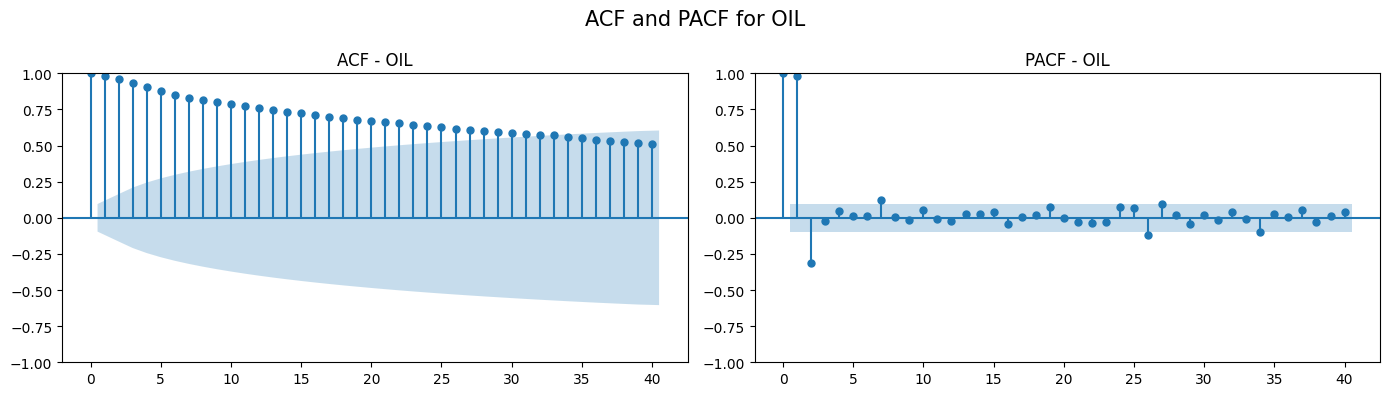

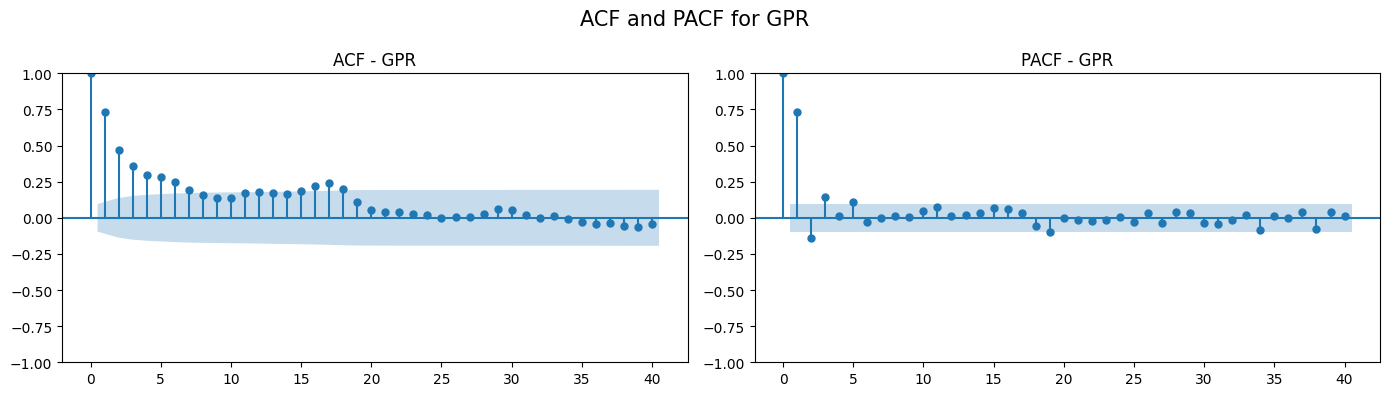

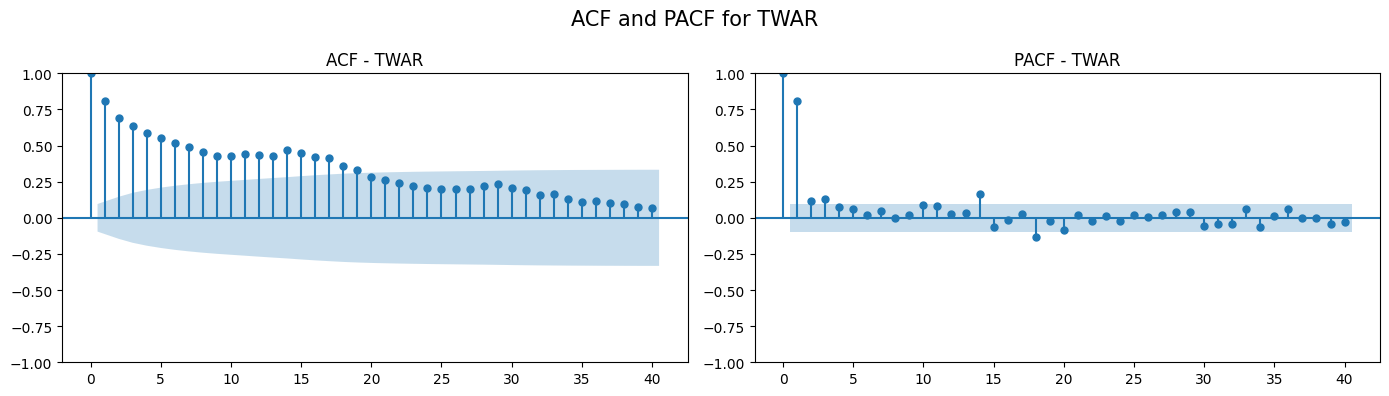

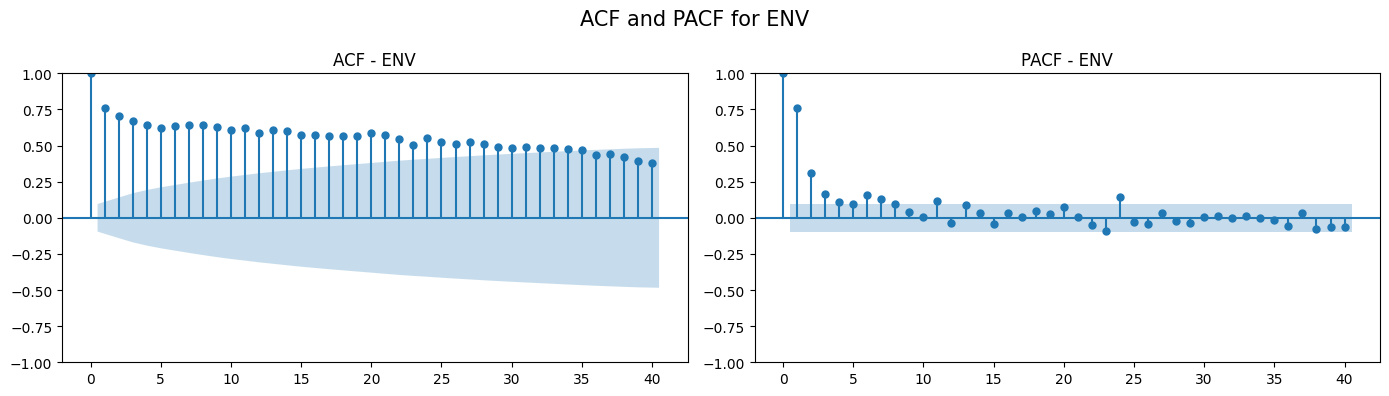

In [ ]:
# Autocorrelation and Partial Autocorrelation Tests

# Plot ACF and PACF for each variabe
targets = ['sp500r', 'oil', 'gpr', 'twar', 'env']

for var in targets:
    fig, axes = plt.subplots(1, 2, figsize=(14, 4))
    fig.suptitle(f"ACF and PACF for {var.upper()}", fontsize=15)

    # ACF
    plot_acf(df[var], lags=40, ax=axes[0], title=f"ACF - {var.upper()}")
    # PACF
    plot_pacf(df[var], lags=40, ax=axes[1], title=f"PACF - {var.upper()}", method='ywm')

    plt.tight_layout()
    plt.show()

**Stationarity Tests:**

In [ ]:
!pip install arch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 985.3/985.3 kB 11.5 MB/s eta 0:00:00


In [ ]:
# Stationarity Tests

from statsmodels.tsa.stattools import adfuller
from arch.unitroot import PhillipsPerron

def stationarity_decision(p_value, alpha=0.05):
    return 'Stationary' if p_value < alpha else 'Non-Stationary'

def adf_pp_test(series, name):
    """
    Perform ADF and PP tests at level and first difference.
    Returns a dictionary with test statistics, p-values, and decisions.
    """
    results = {}

    # ADF at level
    adf_lvl = adfuller(series, regression='c', autolag='AIC')
    results['ADF Stat (Level)'] = round(adf_lvl[0], 3)
    results['ADF p-value (Level)'] = round(adf_lvl[1], 4)
    results['ADF Remark (Level)'] = stationarity_decision(adf_lvl[1])

    # ADF at first difference
    adf_diff = adfuller(series.diff().dropna(), regression='c', autolag='AIC')
    results['ADF Stat (1st Diff)'] = round(adf_diff[0], 3)
    results['ADF p-value (1st Diff)'] = round(adf_diff[1], 4)
    results['ADF Remark (1st Diff)'] = stationarity_decision(adf_diff[1])

    # PP at level
    pp_lvl = PhillipsPerron(series, trend='c', lags=4)
    results['PP Stat (Level)'] = round(pp_lvl.stat, 3)
    results['PP p-value (Level)'] = round(pp_lvl.pvalue, 4)
    results['PP Remark (Level)'] = stationarity_decision(pp_lvl.pvalue)

    # PP at first difference
    pp_diff = PhillipsPerron(series.diff().dropna(), trend='c', lags=4)
    results['PP Stat (1st Diff)'] = round(pp_diff.stat, 3)
    results['PP p-value (1st Diff)'] = round(pp_diff.pvalue, 4)
    results['PP Remark (1st Diff)'] = stationarity_decision(pp_diff.pvalue)

    return results

# Define variables to test
test_vars = ['sp500r', 'oilr', 'gpr', 'twar', 'env']
stationarity_full = {}

# Run stationarity tests
for var in test_vars:
    stationarity_full[var] = adf_pp_test(df[var].dropna(), var)

# Convert to structured DataFrame
stationarity_table = pd.DataFrame(stationarity_full).T
stationarity_table.index.name = 'Variable'

# Display the stationarity table
print("ADF and PP Stationarity Test Results (α = 0.05)")
display(stationarity_table)

ADF and PP Stationarity Test Results (α = 0.05)


,ADF Stat (Level),ADF p-value (Level),ADF Remark (Level),ADF Stat (1st Diff),ADF p-value (1st Diff),ADF Remark (1st Diff),PP Stat (Level),PP p-value (Level),PP Remark (Level),PP Stat (1st Diff),PP p-value (1st Diff),PP Remark (1st Diff)
Variable,,,,,,,,,,,,
sp500r,-10.171,0.0,Stationary,-5.76,0.0,Stationary,-12.794,0.0,Stationary,-25.058,0.0,Stationary
oilr,-13.755,0.0,Stationary,-8.347,0.0,Stationary,-15.074,0.0,Stationary,-34.04,0.0,Stationary
gpr,-6.802,0.0,Stationary,-8.867,0.0,Stationary,-7.834,0.0,Stationary,-21.741,0.0,Stationary
twar,-1.397,0.5839,Non-Stationary,-2.451,0.1278,Non-Stationary,-4.388,0.0003,Stationary,-29.643,0.0,Stationary
env,0.047,0.9623,Non-Stationary,-8.433,0.0,Stationary,-6.432,0.0,Stationary,-38.781,0.0,Stationary


**Cointegration Test:**

In [ ]:
# Johansen Cointegration Test

from statsmodels.tsa.vector_ar.vecm import coint_johansen

# Variables to test
johansen_vars = ['sp500r', 'oilr', 'gpr', 'twar', 'env']
joh_data = df[johansen_vars].dropna()

# Johansen test (det_order = -1: automatically select)
joh_result = coint_johansen(joh_data, det_order=0, k_ar_diff=2)

# Trace statistic and critical values
trace_stat = joh_result.lr1
trace_cv = joh_result.cvt

# Max eigenvalue statistic and critical values
maxeig_stat = joh_result.lr2
maxeig_cv = joh_result.cvm

# Compile results into structured DataFrame
johansen_df = pd.DataFrame({
    'Rank (r)': [f"r ≤ {i}" for i in range(len(trace_stat))],
    'Trace Statistic': np.round(trace_stat, 3),
    'Trace CV (5%)': trace_cv[:, 1],
    'Trace Result': ['Reject' if stat > cv else 'Do Not Reject'
                     for stat, cv in zip(trace_stat, trace_cv[:, 1])],
    'MaxEig Statistic': np.round(maxeig_stat, 3),
    'MaxEig CV (5%)': maxeig_cv[:, 1],
    'MaxEig Result': ['Reject' if stat > cv else 'Do Not Reject'
                      for stat, cv in zip(maxeig_stat, maxeig_cv[:, 1])]
})

print("Johansen Cointegration Results (Trace and Max Eigenvalue - 5% level)")
display(johansen_df)

Johansen Cointegration Results (Trace and Max Eigenvalue - 5% level)


,Rank (r),Trace Statistic,Trace CV (5%),Trace Result,MaxEig Statistic,MaxEig CV (5%),MaxEig Result
0,r ≤ 0,339.534,69.8189,Reject,151.096,33.8777,Reject
1,r ≤ 1,188.438,47.8545,Reject,114.408,27.5858,Reject
2,r ≤ 2,74.030,29.7961,Reject,47.861,21.1314,Reject
3,r ≤ 3,26.169,15.4943,Reject,25.296,14.2639,Reject
4,r ≤ 4,0.873,3.8415,Do Not Reject,0.873,3.8415,Do Not Reject


In [ ]:
# Engle-Granger Linear Cointegration Test

from statsmodels.tsa.stattools import coint

# Define pairwise combinations
eg_pairs = [
    ('sp500r', 'gpr'),
    ('sp500r', 'twar'),
    ('sp500r', 'env'),
    ('oilr', 'gpr'),
    ('oilr', 'twar'),
    ('oilr', 'env'),
]

eg_results = []

# Loop through each pair
for y, x in eg_pairs:
    aligned_data = df[[y, x]].dropna()
    coint_result = coint(aligned_data[y], aligned_data[x])
    test_stat, p_value, _ = coint_result
    eg_results.append({
        'Dependent': y,
        'Independent': x,
        'Test Statistic': round(test_stat, 3),
        'p-value': round(p_value, 4),
        'Result': 'Cointegrated' if p_value < 0.05 else 'Not Cointegrated'
    })

# Convert to DataFrame
eg_df = pd.DataFrame(eg_results)
print("Engle-Granger Cointegration Results (5% Level)")
display(eg_df)

Engle-Granger Cointegration Results (5% Level)


,Dependent,Independent,Test Statistic,p-value,Result
0,sp500r,gpr,-10.209,0.0,Cointegrated
1,sp500r,twar,-8.404,0.0,Cointegrated
2,sp500r,env,-10.606,0.0,Cointegrated
3,oilr,gpr,-13.711,0.0,Cointegrated
4,oilr,twar,-13.792,0.0,Cointegrated
5,oilr,env,-13.768,0.0,Cointegrated


**Structural Break Test:**

In [ ]:
# Chow Single Break Test for Model 1 (Financial Market) and Model 2 (Commodity Market)

import statsmodels.api as sm
from statsmodels.stats.diagnostic import breaks_cusumolsresid
from datetime import datetime

def chow_test(df, yvar, xvars, break_date_str):
    """
    Performs Chow test at a known break date.
    """
    break_date = pd.to_datetime(break_date_str)
    data = df[[yvar] + xvars].dropna()

    # Split data into pre-break and post-break samples
    pre = data[data.index < break_date]
    post = data[data.index >= break_date]

    # Prepare regression variables
    X_pre = sm.add_constant(pre[xvars])
    y_pre = pre[yvar]
    X_post = sm.add_constant(post[xvars])
    y_post = post[yvar]

    # Regressions
    model_full = sm.OLS(data[yvar], sm.add_constant(data[xvars])).fit()
    model_pre = sm.OLS(y_pre, X_pre).fit()
    model_post = sm.OLS(y_post, X_post).fit()

    # Chow F-test calculation
    RSS_full = sum(model_full.resid ** 2)
    RSS_pre = sum(model_pre.resid ** 2)
    RSS_post = sum(model_post.resid ** 2)

    k = len(xvars) + 1  # number of parameters
    n_pre = len(pre)
    n_post = len(post)
    n_total = n_pre + n_post

    F_chow = ((RSS_full - (RSS_pre + RSS_post)) / k) / ((RSS_pre + RSS_post) / (n_total - 2 * k))

    return {
        'Break Date': break_date_str,
        'F-statistic': round(F_chow, 3),
        'Decision (5%)': 'Structural Break' if F_chow > 3 else 'No Break'
    }

# Define Chow test breakpoints
break_dates = ['2001-09-11', '2022-02-24']  # 9/11 and Ukraine Invasion

# Test SP500R and OILR around these dates
chow_results = []

for date in break_dates:
    chow_results.append({**chow_test(df, 'sp500r', ['gpr', 'twar', 'env'], date), 'Variable': 'sp500r'})
    chow_results.append({**chow_test(df, 'oilr', ['gpr', 'twar', 'env'], date), 'Variable': 'oilr'})

# Display results
chow_df = pd.DataFrame(chow_results)[['Variable', 'Break Date', 'F-statistic', 'Decision (5%)']]
print("Chow Structural Break Results")
display(chow_df)

Chow Structural Break Results


,Variable,Break Date,F-statistic,Decision (5%)
0,sp500r,2001-09-11,0.211,No Break
1,oilr,2001-09-11,0.562,No Break
2,sp500r,2022-02-24,13.673,Structural Break
3,oilr,2022-02-24,0.144,No Break



Bai-Perron Structural Breakpoints for SP500R
Detected Break Dates:
 - 2008-08
 - 2009-02
 - 2020-01
 - 2020-03
 - 2024-11


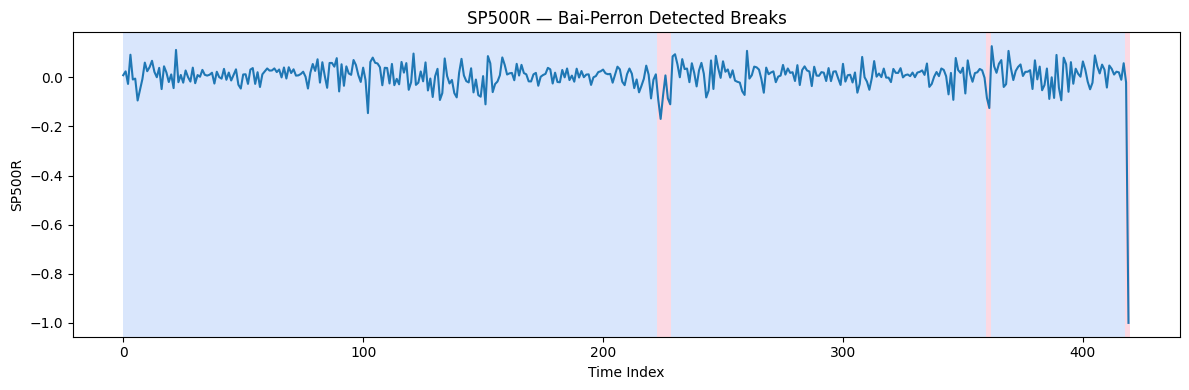


Bai-Perron Structural Breakpoints for OILR
Detected Break Dates:
 - 2008-09
 - 2008-12
 - 2020-02
 - 2020-04
 - 2020-06


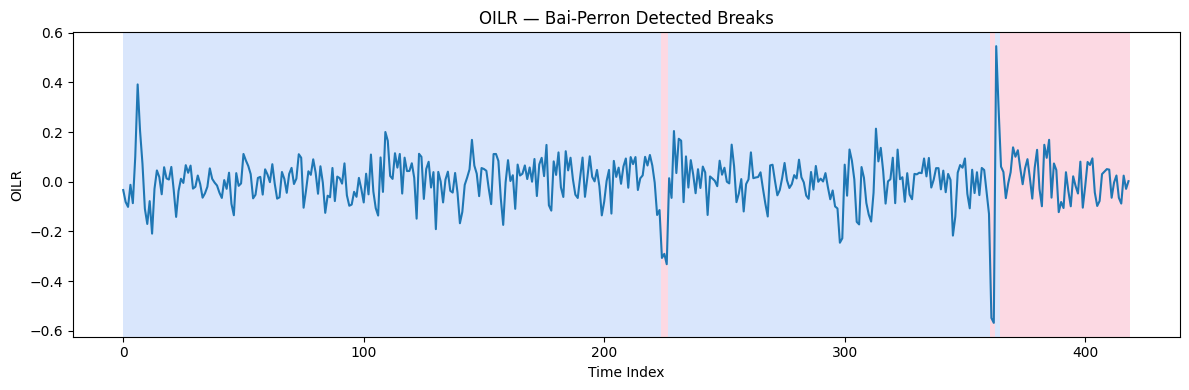

In [ ]:
# Bai-Perron Multiple Break test for Model 1 (Financial Market) and Model 2 (Commodity Market)

!pip install ruptures
import ruptures as rpt

def bai_perron_breaks(series, model="l2", penalty='bic', max_bkps=5):
    """
    Applies Bai-Perron break detection via 'ruptures'.
    """
    algo = rpt.KernelCPD(kernel="linear").fit(series.values.reshape(-1, 1))
    breakpoints = algo.predict(n_bkps=max_bkps)
    return breakpoints

# Run Bai-Perron on SP500 and OIL returns
for var in ['sp500r', 'oilr']:
    print(f"\nBai-Perron Structural Breakpoints for {var.upper()}")
    series = df[var].dropna()
    bkps = bai_perron_breaks(series)
    break_dates = series.index[bkps[:-1]]  # exclude final dummy break
    print("Detected Break Dates:")
    for date in break_dates:
        print(" -", date.strftime('%Y-%m'))

    # Plot
    rpt.display(series.values, bkps, figsize=(12, 4))
    plt.title(f"{var.upper()} — Bai-Perron Detected Breaks")
    plt.xlabel("Time Index")
    plt.ylabel(var.upper())
    plt.tight_layout()
    plt.show()

**Lag Selection Test:**

In [ ]:
# Lag selection test

from statsmodels.tsa.api import VAR

# Target variables
lag_vars = ['sp500r', 'oilr', 'gpr', 'twar', 'env']
lag_data = df[lag_vars].dropna()

# Fit the VAR model and determine optimal lag up to 5
var_model = VAR(lag_data)
lag_selection = var_model.select_order(maxlags=5)

# Extract results as a DataFrame
lag_summary = pd.DataFrame({
    'Lag': range(1, 6),
    'AIC': lag_selection.aic,
    'BIC': lag_selection.bic,
    'HQIC': lag_selection.hqic
}).set_index('Lag')

# Identify optimal lags for each criterion
optimal_lags = {
    'AIC': lag_summary['AIC'].idxmin(),
    'BIC': lag_summary['BIC'].idxmin(),
    'HQIC': lag_summary['HQIC'].idxmin()
}

# Display lag selection table
print("Lag Selection Table (Lags 1 to 5):")
display(lag_summary.round(3))

# Show optimal lag summary
print("\nOptimal Lag Based on Criteria:")
for criterion, opt_lag in optimal_lags.items():
    print(f" - {criterion}: {opt_lag} lags")

Lag Selection Table (Lags 1 to 5):


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)


,AIC,BIC,HQIC
Lag,,,
1,3,1,2
2,3,1,2
3,3,1,2
4,3,1,2
5,3,1,2



Optimal Lag Based on Criteria:
 - AIC: 1 lags
 - BIC: 1 lags
 - HQIC: 1 lags


#**MODEL ESTIMATIONS FOR THE STUDY'S OBJECTIVES AND HYPOTHESES:**

**Hypothesis 1: MS-GARCH - Financial Market Model**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.optimize import minimize

# Financial Market Model
df = pd.read_excel('dataset.xlsx', parse_dates=['date'])
df.set_index('date', inplace=True)
returns = df['sp500r'].dropna().values  # Use SP500 returns
T = len(returns)

# Initialize regimes and parameters
k = 2  # Number of regimes
S = np.zeros((T, k))        # State probabilities
loglik = []                 # Log-likelihood trace
tol = 1e-5                  # Convergence tolerance
max_iter = 300              # Max EM iterations
np.random.seed(42)          # Reproducibility

# Transition matrix P initialization
P = np.array([[0.95, 0.05],
              [0.05, 0.95]])

# Initial GARCH parameters by regime: (omega, alpha, beta, mu)
params = {
    0: {'omega': 0.01, 'alpha': 0.1, 'beta': 0.8, 'mu': 0.0},
    1: {'omega': 0.02, 'alpha': 0.2, 'beta': 0.7, 'mu': 0.0}
}

# Initial variances for each regime
sigma2 = np.full((T, k), 0.02)
gamma = np.full((T, k), 1/k)  # Initial state probability: uniform

print("Initialization complete.")

Initialization complete.


In [ ]:
# Expected Maximization Algorithm for MS-GARCH(1,1)

from scipy.stats import norm
from scipy.optimize import minimize, Bounds

def garch_likelihood(params_vec, r, sigma2_init):
    omega, alpha, beta, mu = params_vec
    T = len(r)
    sigma2 = np.zeros(T)
    ll = 0.0
    sigma2[0] = sigma2_init

    for t in range(1, T):
        sigma2[t] = omega + alpha * (r[t-1] - mu)**2 + beta * sigma2[t-1]
        ll += np.log(2*np.pi*sigma2[t]) + (r[t] - mu)**2 / sigma2[t]

    return 0.5 * ll

def update_garch_params(r, gamma_col, sigma2_init):
    def weighted_nll(params_vec):
        omega, alpha, beta, mu = params_vec
        T = len(r)
        sigma2 = np.zeros(T)
        sigma2[0] = sigma2_init
        ll = 0.0
        for t in range(1, T):
            sigma2[t] = omega + alpha * (r[t-1] - mu)**2 + beta * sigma2[t-1]
            ll += gamma_col[t] * (np.log(2*np.pi*sigma2[t]) + (r[t] - mu)**2 / sigma2[t])
        return 0.5 * ll

    bounds = Bounds([1e-6, 0.0, 0.0, -5.0], [1.0, 1.0, 1.0, 5.0])
    init = [0.01, 0.1, 0.85, 0.0]
    result = minimize(weighted_nll, init, bounds=bounds, method='L-BFGS-B')
    return result.x

# Start EM Algorithm
for iteration in range(max_iter):
    # E-STEP: Forward Filtering
    for t in range(1, T):
        for s in range(k):
            mu_s = params[s]['mu']
            sigma2[t, s] = params[s]['omega'] + params[s]['alpha'] * (returns[t-1] - mu_s)**2 + params[s]['beta'] * sigma2[t-1, s]

        # Compute conditional density for each regime
        likelihood = np.array([
            norm.pdf(returns[t], loc=params[s]['mu'], scale=np.sqrt(sigma2[t, s]))
            for s in range(k)
        ])

        # Transition-weighted prediction
        weights = P.T @ gamma[t-1]
        numer = likelihood * weights
        denom = np.sum(numer)
        gamma[t] = numer / (denom + 1e-12)

    # Compute total log-likelihood
    ll_terms = []
    for t in range(1, T):
        joint_prob_sum = np.sum([
            gamma[t-1, i] * P[i, j] * norm.pdf(returns[t], loc=params[j]['mu'], scale=np.sqrt(sigma2[t, j]))
            for i in range(k) for j in range(k)
        ])
        ll_terms.append(np.log(joint_prob_sum + 1e-12))  # Stability with epsilon

    ll_value = np.sum(ll_terms)
    loglik.append(ll_value)

    # M-STEP: Update GARCH Parameters
    gamma_sum = np.sum(gamma, axis=0)
    for s in range(k):
        p_opt = update_garch_params(returns, gamma[:, s], sigma2[0, s])
        params[s] = dict(zip(['omega', 'alpha', 'beta', 'mu'], p_opt))

    # M-STEP: Update Transition Matrix
    trans_counts = np.zeros((k, k))
    for t in range(1, T):
        for i in range(k):
            for j in range(k):
                p_ij = gamma[t-1, i] * P[i, j] * norm.pdf(returns[t], loc=params[j]['mu'], scale=np.sqrt(sigma2[t, j]))
                trans_counts[i, j] += p_ij

    P = trans_counts / trans_counts.sum(axis=1, keepdims=True)

    # Convergence Check
    if iteration > 2 and abs(loglik[-1] - loglik[-2]) < tol:
        print(f"EM algorithm converged at iteration {iteration} — Log-likelihood: {loglik[-1]:.4f}")
        break

# Final output
print("\nFinal Estimated Parameters (Regime-wise):")
for s in range(k):
    print(f"Regime {s+1}: ω={params[s]['omega']:.4f}, α={params[s]['alpha']:.4f}, β={params[s]['beta']:.4f}, μ={params[s]['mu']:.4f}")

print("\nFinal Transition Matrix (P):")
print(np.round(P, 4))


Final Estimated Parameters (Regime-wise):
Regime 1: ω=0.0001, α=0.2018, β=0.7192, μ=0.0099
Regime 2: ω=0.0001, α=0.2236, β=0.7397, μ=0.0080

Final Transition Matrix (P):
[[9.999e-01 1.000e-04]
 [5.000e-04 9.995e-01]]


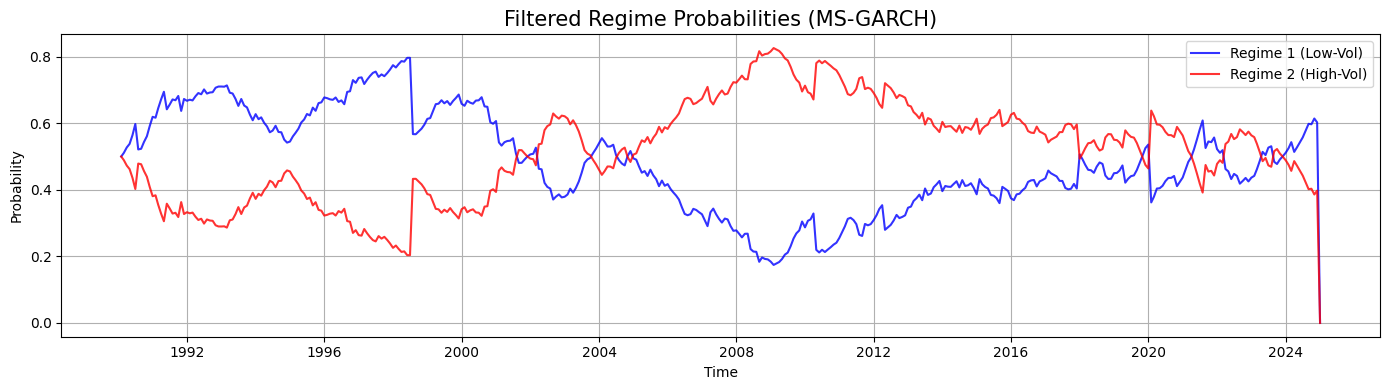

In [ ]:
# Plot filtered regime probabilities

import matplotlib.pyplot as plt

# Create a DataFrame for plotting
gamma_df = pd.DataFrame(gamma, columns=['Regime 1', 'Regime 2'])
gamma_df['Date'] = df.index[:T]
gamma_df.set_index('Date', inplace=True)

# Plot filtered probabilities
plt.figure(figsize=(14, 4))
plt.plot(gamma_df['Regime 1'], label='Regime 1 (Low-Vol)', color='blue', alpha=0.8)
plt.plot(gamma_df['Regime 2'], label='Regime 2 (High-Vol)', color='red', alpha=0.8)
plt.title("Filtered Regime Probabilities (MS-GARCH)", fontsize=15)
plt.ylabel("Probability")
plt.xlabel("Time")
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.show()


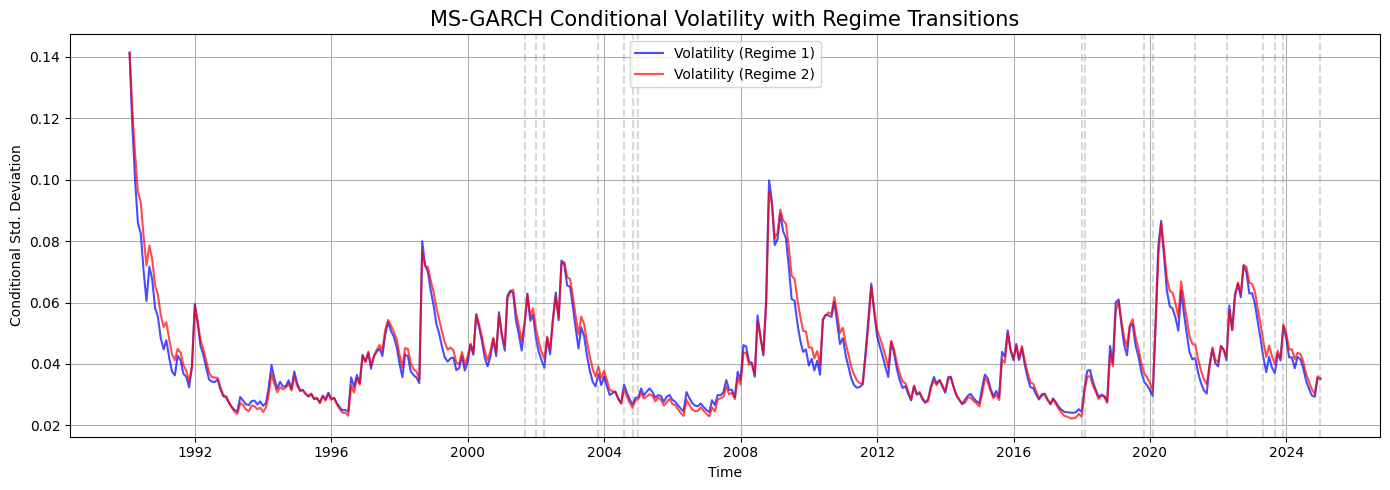

In [ ]:
# Volatility and Regime Annotation Plot

# Assign regime with maximum probability
most_likely_regime = np.argmax(gamma, axis=1)
regime_series = pd.Series(most_likely_regime, index=df.index[:T])

# Plot conditional volatility with regime colors
plt.figure(figsize=(14, 5))
plt.plot(df.index[:T], np.sqrt(sigma2[:, 0]), label='Volatility (Regime 1)', color='blue', alpha=0.7)
plt.plot(df.index[:T], np.sqrt(sigma2[:, 1]), label='Volatility (Regime 2)', color='red', alpha=0.7)

# Regime shading
for t in range(1, T):
    if regime_series.iloc[t] != regime_series.iloc[t-1]:
        plt.axvline(x=regime_series.index[t], color='gray', linestyle='--', alpha=0.3)

plt.title("MS-GARCH Conditional Volatility with Regime Transitions", fontsize=15)
plt.ylabel("Conditional Std. Deviation")
plt.xlabel("Time")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# Estimated MS-GARCH Summary Table

params_table = pd.DataFrame(params).T
params_table.columns = ['omega', 'alpha', 'beta', 'mu']
params_table.index = [f'Regime {i+1}' for i in range(k)]
params_table = params_table.round(4)

print("MS-GARCH Estimated Parameters (Regime-wise):")
display(params_table)

print("\nEstimated Transition Probability Matrix (P):")
P_df = pd.DataFrame(P, columns=['To Regime 1', 'To Regime 2'], index=['From Regime 1', 'From Regime 2'])
display(P_df.round(4))

MS-GARCH Estimated Parameters (Regime-wise):


,omega,alpha,beta,mu
Regime 1,0.0001,0.2018,0.7192,0.0099
Regime 2,0.0001,0.2236,0.7397,0.0080



Estimated Transition Probability Matrix (P):


,To Regime 1,To Regime 2
From Regime 1,0.9999,0.0001
From Regime 2,0.0005,0.9995


**Regime-Dependent with External Shocks: Financial Market**

In [ ]:
# Financial Market Regime-dependent Volatility with External Shocks (GDP, TWAR, and ENV)

import numpy as np
import pandas as pd
from scipy.stats import norm
from scipy.optimize import minimize, Bounds
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_excel("dataset.xlsx", parse_dates=["date"])
df.set_index("date", inplace=True)
df.sort_index(inplace=True)

# Define target variables
r = df["sp500r"].dropna().values  # SP500 returns
X = df[["gpr", "twar", "env"]].dropna().values  # Independent shock variables

# Ensure r and X are aligned
min_len = min(len(r), len(X))
r = r[-min_len:]
X = X[-min_len:]
T, k = len(r), 2  # T: time periods, k: number of regimes
m = X.shape[1]    # number of external variables

# Initialize parameters for each regime
params = {
    0: {'omega': 0.01, 'alpha': 0.1, 'beta': 0.8, 'mu': 0.0, 'delta': np.array([0.01, 0.01, 0.01])},
    1: {'omega': 0.02, 'alpha': 0.15, 'beta': 0.7, 'mu': 0.0, 'delta': np.array([0.05, 0.05, 0.05])}
}

# Transition matrix
P = np.array([[0.95, 0.05],
              [0.05, 0.95]])

# Initial regime probabilities
gamma = np.full((T, k), 1 / k)
sigma2 = np.full((T, k), 0.02)
loglik = []
max_iter = 300
tol = 1e-5

print("MS-GARCH-X initialization complete.")


MS-GARCH-X initialization complete.


In [ ]:
# Expected Maximization Algorithm with External Shocks

# Function to estimate regime-specific GARCH-X parameters with shocks
def update_garchx_params(r, X, gamma_col, sigma2_init):
    def weighted_nll(params_vec):
        omega, alpha, beta = params_vec[:3]
        mu = params_vec[3]
        delta = params_vec[4:]

        T = len(r)
        sigma2 = np.zeros(T)
        sigma2[0] = sigma2_init
        ll = 0.0

        for t in range(1, T):
            x_term = np.dot(delta, X[t])
            sigma2[t] = omega + alpha * (r[t-1] - mu)**2 + beta * sigma2[t-1] + x_term
            sigma2[t] = max(sigma2[t], 1e-8)  # avoid negative variance
            ll += gamma_col[t] * (np.log(2 * np.pi * sigma2[t]) + (r[t] - mu)**2 / sigma2[t])

        return 0.5 * ll

    bounds = Bounds([1e-6, 0.0, 0.0, -5.0] + [-1.0] * m, [1.0, 1.0, 1.0, 5.0] + [1.0] * m)
    init = [0.01, 0.1, 0.85, 0.0] + [0.01] * m
    result = minimize(weighted_nll, init, bounds=bounds, method='L-BFGS-B')
    return result.x


# EM Algorithm Loop
for iteration in range(max_iter):
    # E-STEP: Forward Filtering
    for t in range(1, T):
        for s in range(k):
            mu_s = params[s]['mu']
            delta_s = params[s]['delta']
            x_term = np.dot(delta_s, X[t])
            sigma2[t, s] = params[s]['omega'] + params[s]['alpha'] * (r[t-1] - mu_s)**2 + params[s]['beta'] * sigma2[t-1, s] + x_term
            sigma2[t, s] = max(sigma2[t, s], 1e-8)

        likelihood = np.array([
            norm.pdf(r[t], loc=params[s]['mu'], scale=np.sqrt(sigma2[t, s]))
            for s in range(k)
        ])

        weights = P.T @ gamma[t-1]
        numer = likelihood * weights
        denom = np.sum(numer)
        gamma[t] = numer / (denom + 1e-12)

    # Log-likelihood computation
    ll_terms = []
    for t in range(1, T):
        joint_prob_sum = np.sum([
            gamma[t-1, i] * P[i, j] * norm.pdf(r[t], loc=params[j]['mu'], scale=np.sqrt(sigma2[t, j]))
            for i in range(k) for j in range(k)
        ])
        ll_terms.append(np.log(joint_prob_sum + 1e-12))

    ll_value = np.sum(ll_terms)
    loglik.append(ll_value)

    # M-STEP: Parameter Updates
    for s in range(k):
        opt = update_garchx_params(r, X, gamma[:, s], sigma2[0, s])
        params[s]['omega'] = opt[0]
        params[s]['alpha'] = opt[1]
        params[s]['beta'] = opt[2]
        params[s]['mu'] = opt[3]
        params[s]['delta'] = np.array(opt[4:])

    # M-STEP: Transition Matrix Update
    trans_counts = np.zeros((k, k))
    for t in range(1, T):
        for i in range(k):
            for j in range(k):
                p_ij = gamma[t-1, i] * P[i, j] * norm.pdf(r[t], loc=params[j]['mu'], scale=np.sqrt(sigma2[t, j]))
                trans_counts[i, j] += p_ij

    P = trans_counts / trans_counts.sum(axis=1, keepdims=True)

    # Convergence Check
    if iteration > 2 and abs(loglik[-1] - loglik[-2]) < tol:
        print(f"MS-GARCH-X EM algorithm converged at iteration {iteration}, Log-Likelihood: {loglik[-1]:.4f}")
        break

# Final output
print("\nFinal Estimated Parameters (Regime-wise with shock impacts):")
for s in range(k):
    print(f"\nRegime {s+1}:")
    print(f"ω={params[s]['omega']:.5f}, α={params[s]['alpha']:.5f}, β={params[s]['beta']:.5f}, μ={params[s]['mu']:.5f}")
    print(f"δ (impact of GPR, TWAR, ENV): {np.round(params[s]['delta'], 5)}")

print("\nFinal Transition Matrix (P):")
print(np.round(P, 4))

MS-GARCH-X EM algorithm converged at iteration 3, Log-Likelihood: -966.7022

Final Estimated Parameters (Regime-wise with shock impacts):

Regime 1:
ω=0.01000, α=0.10000, β=0.85000, μ=0.00000
δ (impact of GPR, TWAR, ENV): [0.01 0.01 0.01]

Regime 2:
ω=0.01000, α=0.10000, β=0.85000, μ=0.00000
δ (impact of GPR, TWAR, ENV): [0.01 0.01 0.01]

Final Transition Matrix (P):
[[0.972  0.028 ]
 [0.0886 0.9114]]


In [ ]:
# Import required packages
import numpy as np
import pandas as pd
from scipy.stats import norm
from scipy.optimize import minimize, Bounds
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_excel("dataset.xlsx", parse_dates=["date"])
df.set_index("date", inplace=True)
df.sort_index(inplace=True)

# Define model inputs
# Dependent variable: SP500 return
r = df["sp500r"].dropna().values

# Independent variables: GPR, TWAR, ENV
X = df[["gpr", "twar", "env"]].dropna().values

# Ensure alignment between r and X
min_len = min(len(r), len(X))
r = r[-min_len:]
X = X[-min_len:]

# Set key dimensions
T = len(r)        # number of time steps
k = 2             # number of regimes (high/low volatility)
m = X.shape[1]    # number of independent regressors (3)

# Initialize regime-specific parameters
params = {
    0: {'omega': 0.01, 'alpha': 0.1, 'beta': 0.8, 'mu': 0.0, 'delta': np.array([0.01, 0.01, 0.01])},  # stable regime
    1: {'omega': 0.02, 'alpha': 0.15, 'beta': 0.7, 'mu': 0.0, 'delta': np.array([0.05, 0.05, 0.05])}  # crisis regime
}

# Initialize transition matrix
P = np.array([[0.95, 0.05],
              [0.05, 0.95]])  # rows sum to 1

# Initialize gamma (state probabilities) and volatility
gamma = np.full((T, k), 1 / k)   # uniform initial probabilities
sigma2 = np.full((T, k), 0.02)   # constant starting variance
loglik = []                      # for likelihood tracking

# EM control settings
max_iter = 300
tol = 1e-5

# Initialization complete
print("MS-GARCH-X initialization complete.")

MS-GARCH-X initialization complete.


**Hypothesis 2A: DCC-GARCH**

**Hypothesis 2B: Diebold-Yilmaz Spillover**

#**ADVANCED ML/DL TECHNIQUES:**

**LSTM Analysis:**

**Bayesian Network Analysis:**

#**PRACTICAL APPLICATIONS:**

**Stress Testing:**

**Portfolio Analysis:**

**Risk Analysis:**